In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df= pd.read_csv('employee_attrition_dataset.csv')
df.isna().sum()

Age                          0
Gender                       0
MaritalStatus                0
JobRole                      0
Department                   0
BusinessTravel               0
YearsAtCompany               0
MonthlyIncome              100
EnvironmentSatisfaction    100
PerformanceRating            0
WorkLifeBalance              0
OverTime                     0
NumCompaniesWorked         100
PercentSalaryHike            0
DistanceFromHome           100
Attrition                    0
dtype: int64

Filling missing values

In [ ]:
import numpy as np

df['MonthlyIncome']= df.groupby('JobRole')['MonthlyIncome'].transform(lambda x: x.fillna(x.median()))
df['EnvironmentSatisfaction'] = df.groupby('JobRole')['EnvironmentSatisfaction'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan))
df.isna().sum()

Age                          0
Gender                       0
MaritalStatus                0
JobRole                      0
Department                   0
BusinessTravel               0
YearsAtCompany               0
MonthlyIncome                0
EnvironmentSatisfaction      0
PerformanceRating            0
WorkLifeBalance              0
OverTime                     0
NumCompaniesWorked         100
PercentSalaryHike            0
DistanceFromHome           100
Attrition                    0
dtype: int64

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Columns to impute
columns_to_impute = ['NumCompaniesWorked', 'DistanceFromHome']

# Perform predictive imputation for each column
for column in columns_to_impute:
    # Separate rows with and without missing values
    df_missing = df[df[column].isnull()]
    df_not_missing = df[df[column].notnull()]

    # Select features for prediction (exclude target and columns with missing values)
    features = df_not_missing.drop(columns=[column, 'Attrition'])
    features = pd.get_dummies(features, drop_first=True)  # Encode categorical variables
    target = df_not_missing[column]

    # Impute missing values in features
    imputer = SimpleImputer(strategy='mean')
    features_imputed = imputer.fit_transform(features)

    # Train regression model
    model = LinearRegression()
    model.fit(features_imputed, target)

    # Prepare features for prediction
    missing_features = df_missing.drop(columns=[column, 'Attrition'])
    missing_features = pd.get_dummies(missing_features, drop_first=True)

    # Align columns with training features
    missing_features = missing_features.reindex(columns=features.columns, fill_value=0)
    missing_features_imputed = imputer.transform(missing_features)

    # Predict missing values
    predicted_values = model.predict(missing_features_imputed)

    # Fill missing values in the original dataframe
    df.loc[df[column].isnull(), column] = predicted_values

In [12]:
df.isna().sum()

Age                        0
Gender                     0
MaritalStatus              0
JobRole                    0
Department                 0
BusinessTravel             0
YearsAtCompany             0
MonthlyIncome              0
EnvironmentSatisfaction    0
PerformanceRating          0
WorkLifeBalance            0
OverTime                   0
NumCompaniesWorked         0
PercentSalaryHike          0
DistanceFromHome           0
Attrition                  0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1000 non-null   int64  
 1   Gender                   1000 non-null   object 
 2   MaritalStatus            1000 non-null   object 
 3   JobRole                  1000 non-null   object 
 4   Department               1000 non-null   object 
 5   BusinessTravel           1000 non-null   object 
 6   YearsAtCompany           1000 non-null   int64  
 7   MonthlyIncome            1000 non-null   float64
 8   EnvironmentSatisfaction  1000 non-null   float64
 9   PerformanceRating        1000 non-null   int64  
 10  WorkLifeBalance          1000 non-null   int64  
 11  OverTime                 1000 non-null   object 
 12  NumCompaniesWorked       1000 non-null   float64
 13  PercentSalaryHike        1000 non-null   int64  
 14  DistanceFromHome         

 Visualize Distributions of Numerical Features

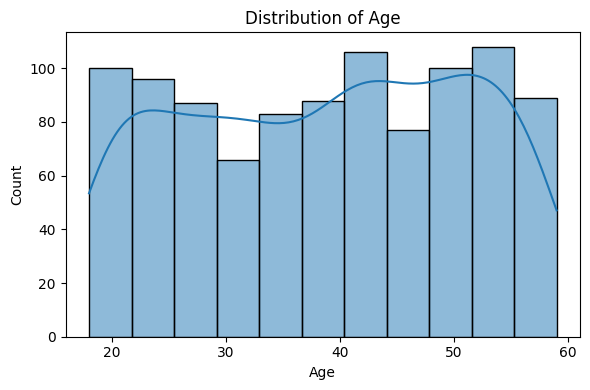

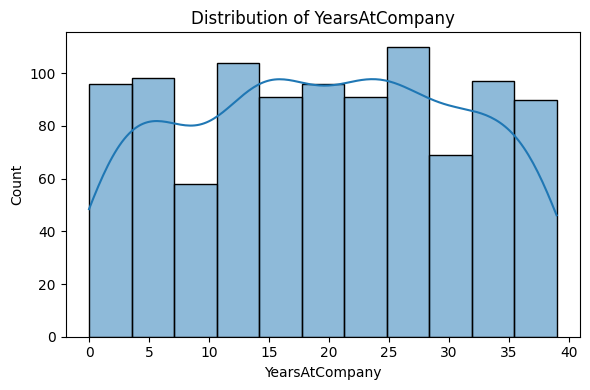

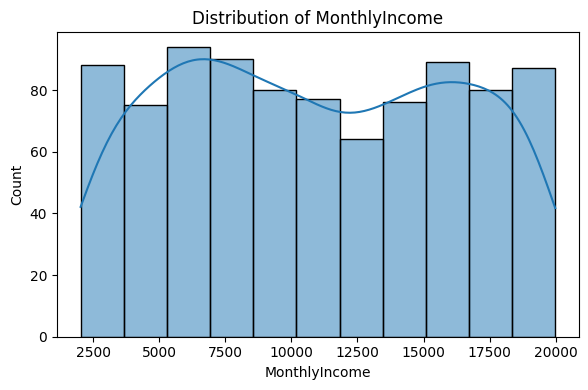

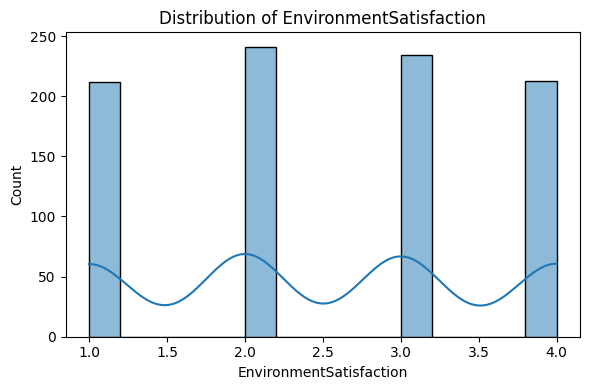

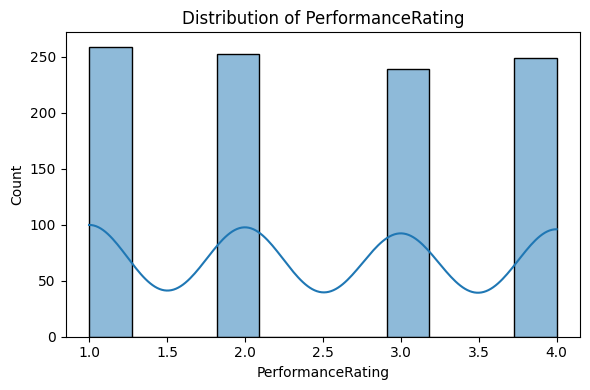

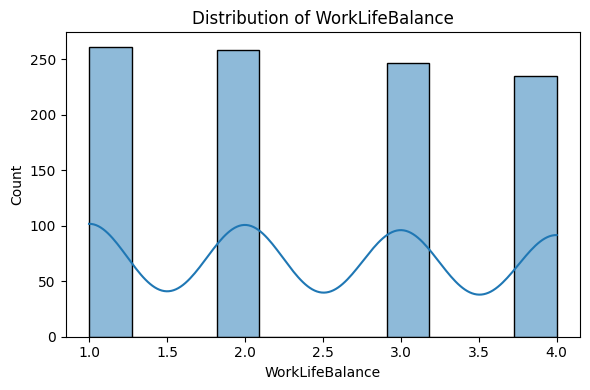

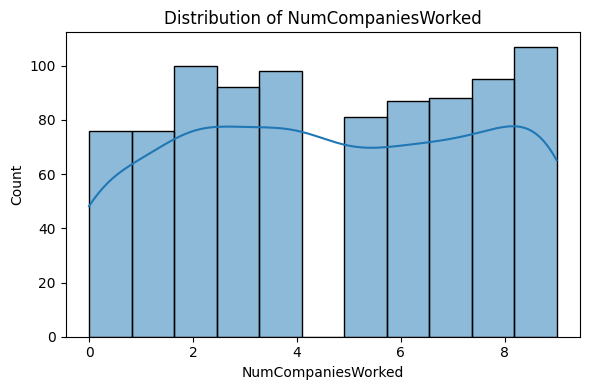

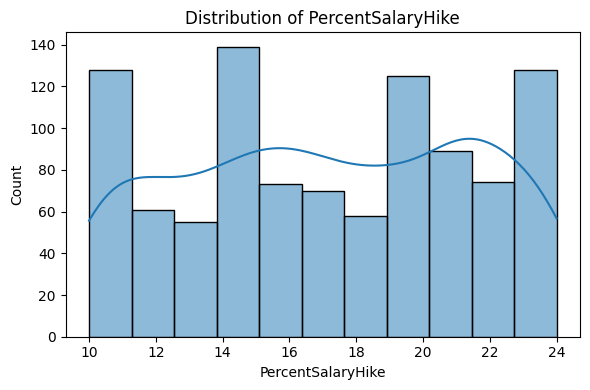

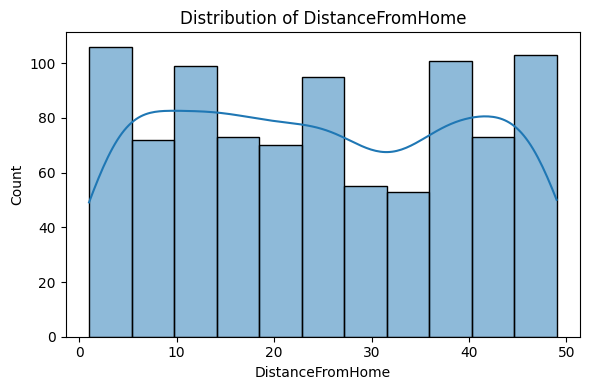

In [28]:
import numpy as np

numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()

for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

Analysing the Categorical columns

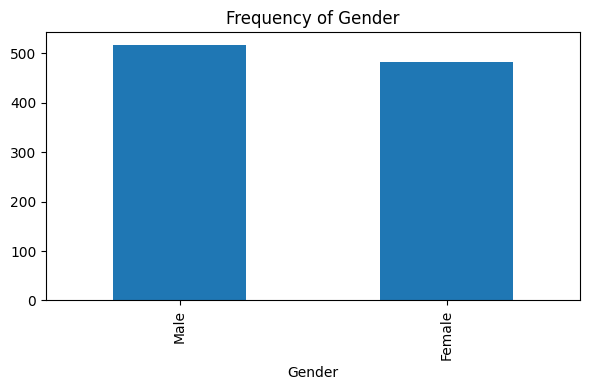

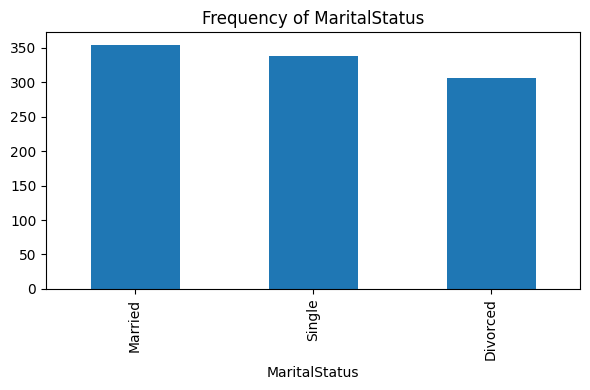

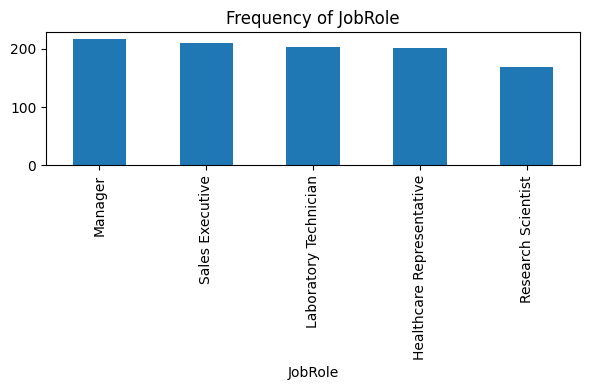

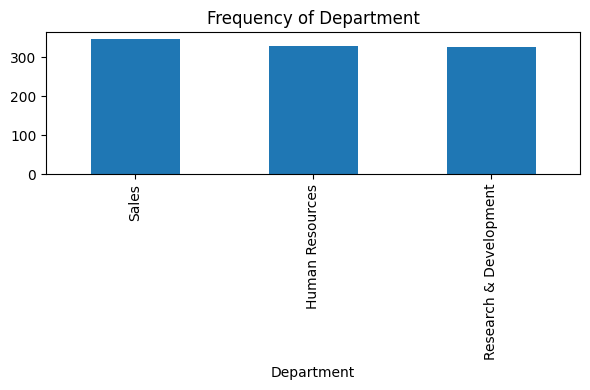

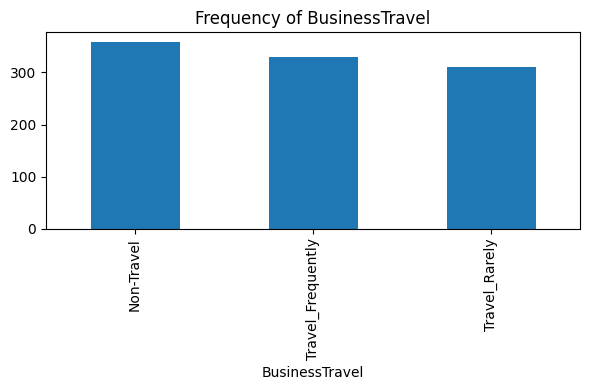

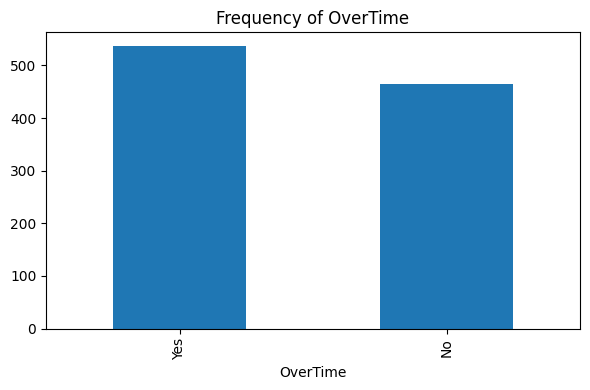

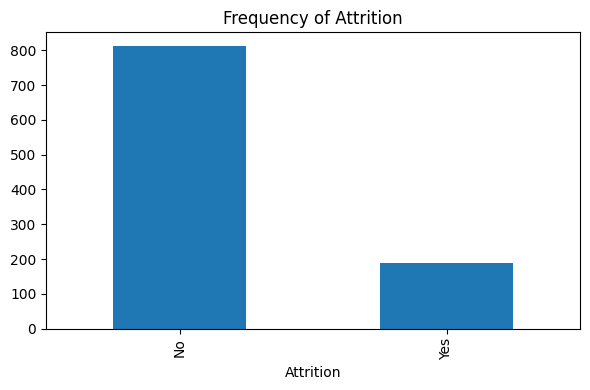

In [36]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

for col in categorical_features:
    plt.figure(figsize=(6, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Frequency of {col}')
    plt.tight_layout()
    plt.show()

Correlation Heatmap for Numerical Features

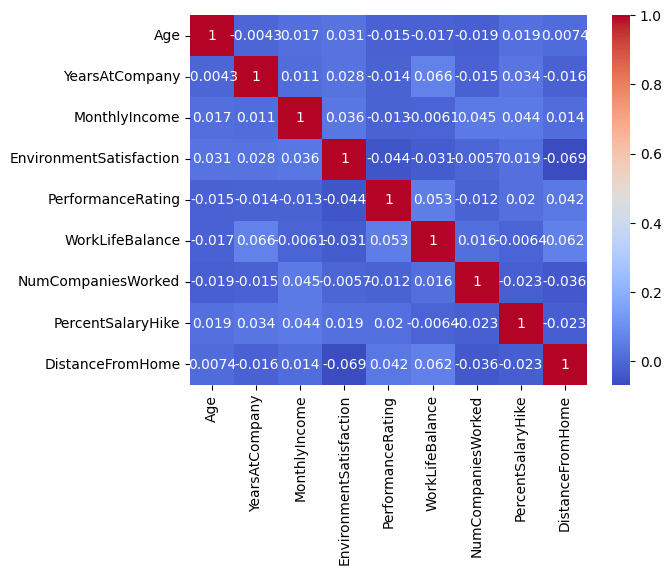

In [37]:
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()

sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.show()

Check Class Imbalance in Target Variable

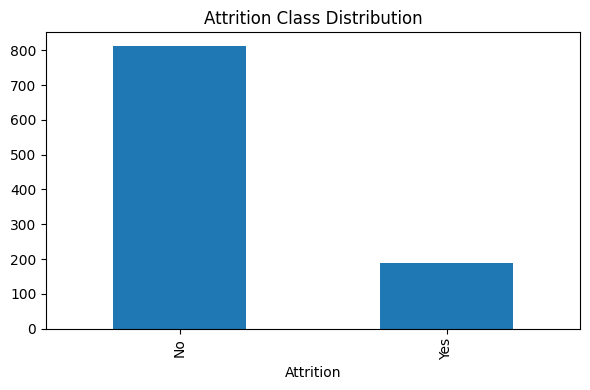

In [ ]:
plt.figure(figsize=(6, 4))
df['Attrition'].value_counts().plot(kind='bar')
plt.title("Attrition Class Distribution")
plt.tight_layout()
plt.show()

Hot Encoding

In [40]:
df_imputed= pd.get_dummies(df, drop_first=True)
df_imputed

,Age,YearsAtCompany,MonthlyIncome,EnvironmentSatisfaction,PerformanceRating,WorkLifeBalance,NumCompaniesWorked,PercentSalaryHike,DistanceFromHome,Gender_Male,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Research Scientist,JobRole_Sales Executive,Department_Research & Development,Department_Sales,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,OverTime_Yes,Attrition_Yes
0,56,39,18667.0,4.0,3,1,3.0,24,38.0,True,...,False,False,False,True,True,False,False,True,True,False
1,46,10,7840.0,4.0,3,1,9.0,20,3.0,True,...,False,False,True,False,True,False,True,False,True,False
2,32,2,5565.0,1.0,1,1,2.0,18,40.0,False,...,False,True,False,False,False,True,True,False,True,False
3,25,11,12426.0,4.0,2,1,3.0,17,31.0,False,...,False,False,False,True,False,False,True,False,True,True
4,38,2,19849.0,NaN,4,4,8.0,18,NaN,True,...,True,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,41,11,6207.0,1.0,3,4,6.0,14,17.0,False,...,False,False,True,False,True,False,True,False,True,False
996,32,15,17043.0,4.0,1,1,9.0,19,37.0,True,...,False,True,False,False,False,True,True,False,True,False
997,46,31,11078.0,3.0,2,4,7.0,11,44.0,False,...,False,False,False,False,False,True,False,False,True,False
998,25,14,13725.0,3.0,2,4,8.0,14,9.0,True,...,False,True,False,False,False,False,True,False,False,False


Model Training

In [45]:
x= df_imputed.drop(columns='Attrition_Yes', axis=1)
y= df_imputed['Attrition_Yes']

from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
x[numerical_features]= scaler.fit_transform(x[numerical_features])

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x.fillna(0), y)

In [46]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

roc_auc = roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])
print("ROC AUC Score:", roc_auc)

              precision    recall  f1-score   support

       False       0.73      0.75      0.74       165
        True       0.74      0.71      0.72       160

    accuracy                           0.73       325
   macro avg       0.73      0.73      0.73       325
weighted avg       0.73      0.73      0.73       325

[[124  41]
 [ 46 114]]
ROC AUC Score: 0.8071590909090909


Insights

In [48]:
feature_importance = pd.DataFrame({
    'Feature': x.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(feature_importance.head(10))  # Top 10 features

                              Feature  Coefficient
13                    JobRole_Manager     1.524460
14         JobRole_Research Scientist     1.401504
10              MaritalStatus_Married     1.199802
16  Department_Research & Development     1.107217
19       BusinessTravel_Travel_Rarely     1.086685
12      JobRole_Laboratory Technician     1.072627
15            JobRole_Sales Executive     0.976966
17                   Department_Sales     0.942015
11               MaritalStatus_Single     0.789730
9                         Gender_Male     0.788623
